In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path_to_obs = 'Kelly_SNOTEL.csv'

In [31]:
df = pd.read_csv(path_to_obs)
df=df.dropna()
df['time'] = pd.to_datetime(df['time'])
df['snow_water_equivalent'] = df['snow_water_equivalent'].astype(np.float32)
df.loc[df['snow_water_equivalent']<0, 'snow_water_equivalent'] = 0
df=df.dropna()
df['depth (m)'] = df['snow_water_equivalent'] * 0.225 / 100
df.head()

/tmp/ipykernel_93071/2961089810.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_to_obs)


,time,lwe_thickness_of_precipitation_amount,solar_irradiance_cm_time__mean_over_pt1h,snow_water_equivalent,air_temperature,air_temperature_qc_agg,depth (m)
4,2011-07-22 16:00:00+00:00,343.0,182.0,0.0,9.7,1.0,0.0
8,2011-07-22 17:00:00+00:00,343.0,182.0,0.0,12.8,1.0,0.0
12,2011-07-22 18:00:00+00:00,338.0,160.0,0.0,13.6,1.0,0.0
16,2011-07-22 19:00:00+00:00,340.0,311.0,0.0,13.8,1.0,0.0
20,2011-07-22 20:00:00+00:00,338.0,290.0,0.0,14.9,1.0,0.0


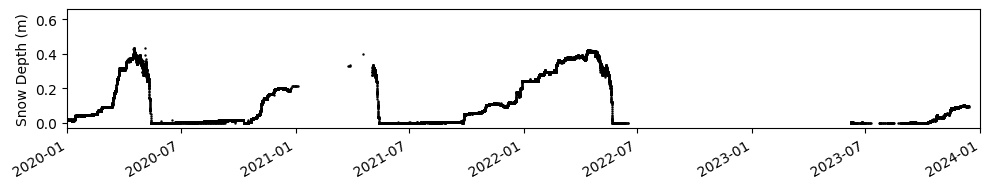

In [40]:
fig, axes = plt.subplots(figsize=(10, 2))

#sns.scatterplot(data=df, x='time', y='snow_water_equivalent', ax = axes[0])
sns.scatterplot(data=df, x='time', y='depth (m)', color='black', s=3, linewidth=0, ax = axes)

#axes[0].set_ylabel('SWE (mm)')
axes.set_ylabel('Snow Depth (m)')
axes.set_xlabel('')

axes.set_xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2024-01-01'))
fig.autofmt_xdate()
fig.tight_layout()
plt.savefig('Kelly_SNOTEL_snow_depth.jpg', dpi=300)